# Coffee and Productivity

Does coffee consumption in a population correlate with higher productivity as measured in GDP per hour worked?

Background: On an individual level, consumption of coffee and its active ingredient, caffeine (a stimulant), is associated with higher levels of “energy” and “productivity”. But in a given population, such as a nation-state, does higher coffee consumption indicate a higher level of productivity? 


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
coffee_data_to_load = "data/project_data.csv"

# Read the Data
coffee_data = pd.read_csv(coffee_data_to_load)

#coffee_data.tail()
coffee_data.head()
coffee_data.columns
# plt.rcParams["figure.figsize"] = 16,9


Index(['Country Name', 'Year', 'Coffee Consumed', 'MEASURE',
       'gdp_per_hour_worked ($)', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'population', 'Unemployed (%)', 'Coffee Consumed in KG',
       'Coffee Consumed per Capita in Kg'],
      dtype='object')

## 1-1. World Coffee Consumption by Year: Does World Consume More Coffee Over Time?
mean coffee consumption by year (line graph) - 
x axis = year
y axis = coffee amount
Karen

## 1-2. Coffee Consumption Trend by Country: How Much Coffee Is Consumed by Year (in Total)?
use project_data.csv to generate the plot. (line graph) - mean by year. Plot in line.
Karen

## 3-1. Overall Productivity Trend: Does Productivity Grow by Year? (Growth in labour productivity indicates a higher level of output for every hour worked)
mean productivity (line plot)
x axis = year
y axis = GDPhrwkd
Jin


## 3-2. Productivity Trend by Country: How Does Productivity Change by Country Over Time?
use project_data.csv to generate the plot. (line graph)  - GDP per hour worked
Jin

## 2. Top Coffee Drinking Nations (per Capita, kg or lb): Which Country Drinks Coffee the Most per Person in 20XX?
use project_data.csv to generate the plot. (bar graph) - top 10? 
Srini

In [2]:
# Top 10 cofee drinking nations
group_by_country = coffee_data.groupby(["Country Name"])
#Mean of all values by country
mean_values_country = group_by_country.mean()
mean_values_country_df = pd.DataFrame(mean_values_country)
# Top 10 countries copee per capita
top_coffee_pc = mean_values_country_df.sort_values("Coffee Consumed per Capita in Kg", ascending = False)\
.head(10).reset_index()
top_coffee_pc

,Country Name,Year,Coffee Consumed,gdp_per_hour_worked ($),gdp_per_capita ($),population,Unemployed (%),Coffee Consumed in KG,Coffee Consumed per Capita in Kg
0,Luxembourg,2006.0,199.533333,79.121716,90460.266667,4.496169e+05,4.113333,11972000.0,26.423295
1,Finland,2006.0,1039.466667,48.167631,42034.133333,4.988896e+06,8.326667,62368000.0,12.495654
2,Norway,2006.0,727.866667,76.472931,75436.600000,4.412433e+06,3.506667,43672000.0,9.906478
3,Denmark,2006.0,791.400000,57.955926,52241.400000,5.125666e+06,5.386667,47484000.0,9.271576
4,Sweden,2006.0,1210.200000,50.455248,47306.200000,8.637735e+06,6.973333,72612000.0,8.414779
5,Switzerland,2006.0,950.200000,54.612935,63836.666667,7.174788e+06,3.746667,57012000.0,7.928225
6,Austria,2006.0,947.733333,48.941178,41673.933333,7.833810e+06,4.306667,56864000.0,7.254740
7,Germany,2006.0,9190.266667,54.533775,37770.733333,7.847162e+07,8.066667,551416000.0,7.027299
8,Belgium,2006.0,1110.466667,60.540606,39631.266667,1.000976e+07,7.720000,66628000.0,6.672928
9,Netherlands,2006.0,1609.066667,58.151039,44997.200000,1.538864e+07,3.873333,96544000.0,6.289011


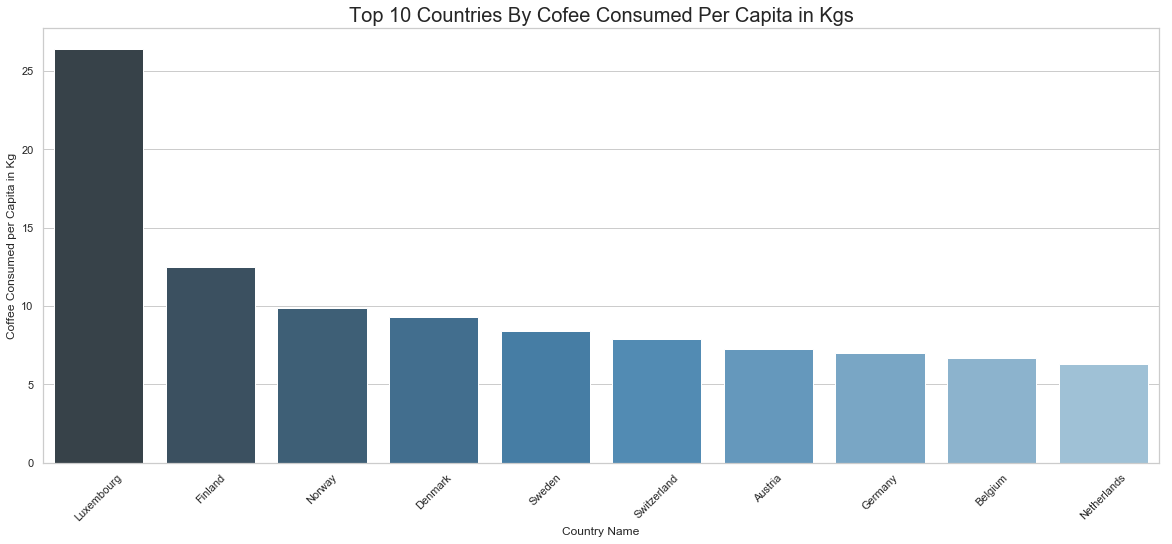

In [3]:
#top 10 Coffee drinking per capita graph
plt.figure(figsize=(20,8))
sns.set(style="whitegrid")
g=sns.barplot(x='Country Name',y='Coffee Consumed per Capita in Kg',data=top_coffee_pc, palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Top 10 Countries By Cofee Consumed Per Capita in Kgs", size =20)
plt.savefig("Top_10_Coffee.png")
plt.show()

## 4. Top Productivity Countries in 20XX: Which Countries Show Higher Productivity Compare to Other Countries?
use project_data.csv to generate the plot. (bubble plot)
x axis = countries
y axis = productivity (GDPhrworkd)
bar graph or scatter plot
all countries in data
Srini

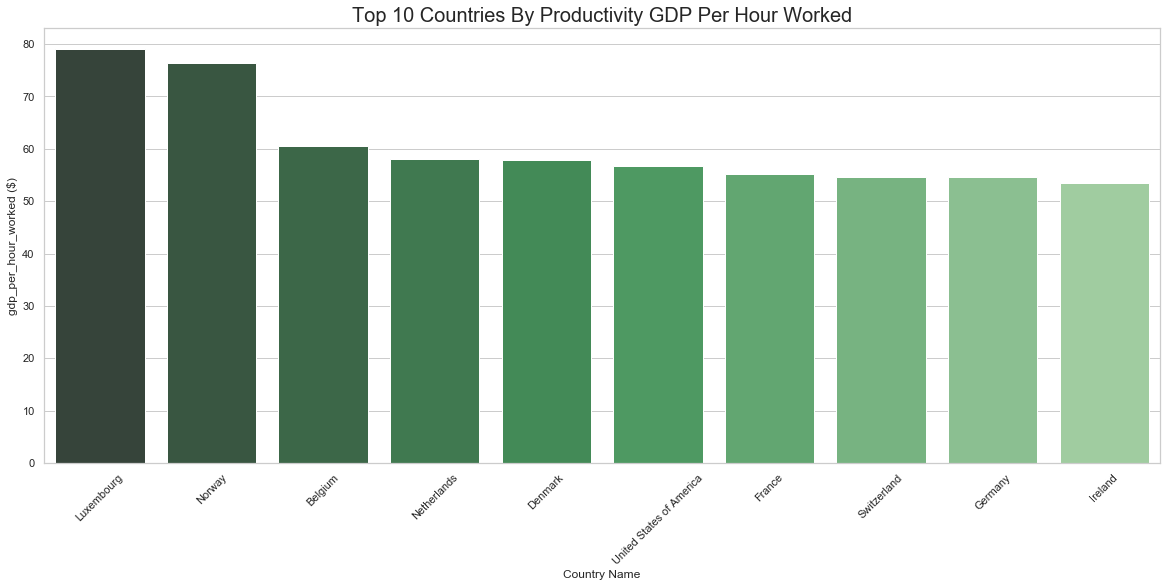

In [21]:
# Top 10 productivity countries per capita
top_productivity_pc = mean_values_country_df.sort_values("gdp_per_hour_worked ($)", ascending = False)\
.head(10).reset_index()
top_productivity_pc
#top 10 Coffee drinking per person graph
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
g=sns.barplot(x='Country Name',y='gdp_per_hour_worked ($)',data=top_productivity_pc, palette="Greens_d")
plt.xticks(rotation=45)
#plt.grid(True)
plt.title('Top 10 Countries By Productivity GDP Per Hour Worked', size =20)
plt.savefig("Top_10_Productive.png")
plt.show()

In [61]:
# Top 10 productive nations
group_by_country = coffee_data.groupby(["Country Name"])

# Mean productivity by coungry
productivity_per_person = group_by_country["gdp_per_hour_worked ($)"].mean()
productivity_per_person_df = pd.DataFrame(productivity_per_person)
#productivity_per_person_df.head()
top_productive = productivity_per_person_df.sort_values("gdp_per_hour_worked ($)",\
                                                        ascending = False).head(10).reset_index()
#top_productive
plt.figure(figsize=(20,8))
g=sns.barplot(x='Country Name',y='gdp_per_hour_worked ($)',data=top_productive, palette="Blues_d")

for index, row in top_productive.iterrows():
    g.text(row.name,row.tip,round(row.['gdp_per_hour_worked ($)'],2), color='black', ha="center")
plt.title('Top 10 Countries By Productivity')
plt.savefig("Top_10_Productive.png")
plt.show()

SyntaxError: invalid syntax (<ipython-input-61-1e06a62b44d4>, line 13)

## 5-1. Correlation Between Coffee Consumption and Productivity: Does the amount of Coffee Consumption affect Productivity among countries? (Pick a certain year, ex: 2013)
use project_data.csv to generate the plot. (bubble plot and regression)
x axis = country
y axis = GPDhrwkd
bubble size coffee consumption?
(maybe swap y axis and bubble size?)
maybe a whisker plot - how far away from mean?
total consumption and total GDPhrwkd for selected years (pick maybe two or three to compare?)
Michael

## 5-2. Correlation of Changes in Coffee Consumption and Productivity: Does the Changes in the Coffee Consumption Correlated with the Changes in Productivity throughout Certain period? (dynamic analysis, Pick countries which show bigger changes in values) 
use project_data.csv to generate the plot. (scatter plot and regression)

x axis = country 
y axis = gdphrwkd
calculate the increased/decreased value of consumption
calculate the increased/decreased value of GDPhrwkd
ex: all years or 10 years (if plot is too busy) or in some increment (2 years, 5 years)?
look for dramatic changes
Michael


## 6-1. Correlation Between Coffee Consumption and Productivity: Is P-Value < 0.05 and Can We Reject Null-Hypothesis(H0)? (Hypothesis Test)
P-Value graph
this assumes a single year in 5-1
Andrew

## 6-2. Correlation Between the Changes in the Coffee Consumption and the Changes in Productivity: Is P-Value < 0.05 and Can We Reject Null-Hypothesis(H0)? (Hypothesis Test)

Different from 6-1. 
This is for the "rate of change" in 5-2
Andrew

## 7. Correlation Between Coffee Consumption and Unemployment: A question needs to be defined (optional)
use project_data.csv to generate the plot. 


## 8. World Coffee Major Producers as % of World: Which Countries Produce Coffee? (optional)
use exports data from www.ico.org/new_historical.asp to generate the plot.(pie chart or bubble map??)

## Conclusions
Summary of findings - Andrew

In [ ]:
# DATA Source
http://www.ico.org/new_historical.asp
https://knoema.com/search?query=coffee&source=HomePage
https://www.worldatlas.com/articles/top-10-coffee-consuming-nations.html
https://fusiontables.google.com/DataSource?docid=1C-fn6nSe21acP0xJIO1T1x0wohqfMYCQyJjbqdk#rows:id=1
https://data.oecd.org/lprdty/gdp-per-hour-worked.htm
https://www.oecd-ilibrary.org/employment/data/oecd-productivity-statistics/gdp-per-capita-and-productivity-growth_data-00685-en